# AI Model Basics

## What is an AI model?

- AI models or artificial intelligence models are programs that detect specific patterns using a collection of data sets.
- It is an illustration of a system that can receive data inputs and draw conclusions or conduct actions depending on those conclusions.
- Once trained, an AI model can be used to make future predictions or act on data that was not previously observed.
- AI models can be used for a variety of activities, from image and video recognition to natural language processing (NLP), anomaly detection, recommender systems, predictive modeling and forecasting, and robotics and control systems.

> So in conclusion, a simple program which does not need `if` condition for every data point


### So What the h*ll is AI, ML, DL, deep learning etc?

![al-ml-ds](./assets/py-ds-ml-ai.png)

## Intro to linear regression

[Watch Me](https://youtu.be/CtsRRUddV2s?si=MxDKu-NAIN1X0ANg)

Before we begin, don’t forget to install [scikit-learn](https://scikit-learn.org/stable/), it provides easy to use functions and predefined models which saves a lot of time

In [ ]:
!pip install scikit-learn

### Sample Training Set
Here, X is the input and y is the output.

![py-ml-traning](./assets/py-ml-training.webp)

Given the training set you could easily guess that the output (y) is nothing but (x1 + 2*x2 + 3*x3).

## The ML Model -Linear Regression
Working with linear regression model is simple. Create a model, train it and then use it :)

![py-linear-reg](./assets/py-linear-reg.webp)

### Generate Training Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.linear_model import LinearRegression, LogisticRegression

In [61]:
from random import randint
TRAIN_SET_LIMIT = 100
TRAIN_SET_COUNT = 20

TRAIN_INPUT = list()
TRAIN_OUTPUT = list()

for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
    op = a + (2*b) + (3*c)
    TRAIN_INPUT.append([a, b, c])
    TRAIN_OUTPUT.append(op)
TRAIN_INPUT = np.asarray(TRAIN_INPUT)
TRAIN_OUTPUT = np.asarray(TRAIN_OUTPUT)

### Train The Model
We have the training set ready, so create a Linear Regression Model and pass it the training data.

In [62]:
predictor = LinearRegression(n_jobs=-1)
predictor.fit(X=TRAIN_INPUT, y=TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)

### Test Model
X = [[10, 20, 30]]

The outcome should be 10 + 20*2 + 30*3 = 140. Let’s see what we got…



In [63]:
TEST_INPUTS = np.asarray([
    [10, 20, 30], # 10 + 2x20 + 3x30 = 140
    [2,3,4]       # 2 + 2x3 + 3x4    = 20
])
TEST_OUTCOMES = np.asarray(predictor.predict(X=TEST_INPUTS))

print(TEST_OUTCOMES)

[140.  20.]


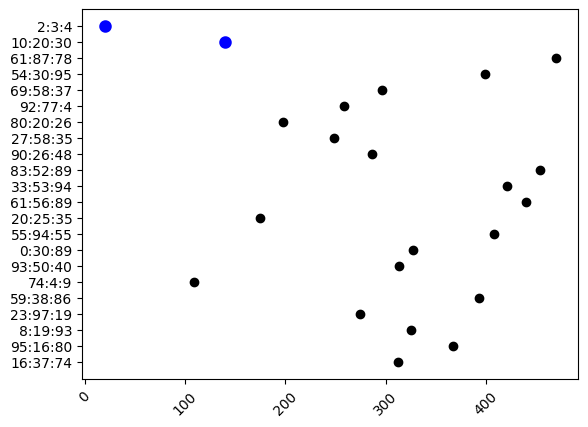

In [58]:
# lets plot it
TRAINING_SET = pd.DataFrame({
    "Training Input": np.asarray(list(map(lambda x: ":".join(str(v) for v in x), TRAIN_INPUT))),
    "Training Output": TRAIN_OUTPUT
})

fig, ax = plt.subplots()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.scatter(
    TRAIN_OUTPUT,
    list(map(lambda x: ":".join(str(value) for value in x), TRAIN_INPUT)),
    color="black")

ax.scatter(
    TEST_OUTCOMES,
    list(map(lambda x: ":".join(str(value) for value in x), TEST_INPUTS)),
    color="blue", linewidth=3)

plt.show()


## Sample Statement
Consider a very primitive example when you have to decide whether to wear a jacket or not depending on the weather. You have access to the training data as we call it

| Outside Temperature | Wear a Jacket|
|---|---------------|
| 30°C                | No            |
| 25°C                	| No            	|
| 20°C                	| No            	|
| 15°C                	| Yes           	|
| 10°C                	| Yes           	|

In [31]:
SAMPLE_TEMP = [[30], [25], [20], [15], [10]]
SAMPLE_OUTPUTS = [False,False, False, True, True] # TODO: chande to binary for LogisticRegression

jacket = LinearRegression(n_jobs=-1) # TODO: Use LogisticRegression instead
jacket.fit(
    X= SAMPLE_TEMP,
    y= SAMPLE_OUTPUTS)

LinearRegression(n_jobs=-1)

In [60]:
def wear_jacket(temperatures):
    prediction = jacket.predict(temperatures)
    print(prediction)
    answers = list(map(lambda x: "Yes" if int(x) > 0 else "No", prediction))
    return answers

TEST_TEMPS = np.asarray([[26], [45],[5], [-4], [23]])
TEST_OUTPUTS = wear_jacket(TEST_TEMPS)
print(TEST_OUTPUTS)

[ 0.04 -1.1   1.3   1.84  0.22]
['No', 'No', 'Yes', 'Yes', 'No']


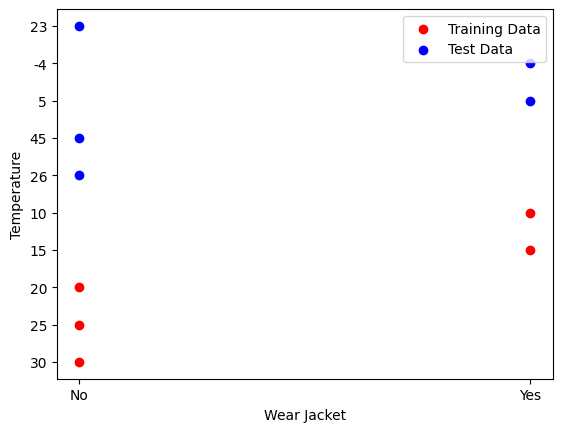

In [59]:
plt.scatter(
    list(map(lambda x: "Yes" if x else "No", SAMPLE_OUTPUTS)),
    list(map(lambda x: ":".join(str(value) for value in x), SAMPLE_TEMP)),
    color="red"
)

plt.scatter(
    TEST_OUTPUTS,
    list(map(lambda x: ":".join(str(value) for value in x), TEST_TEMPS)),
    color="blue")

plt.legend(["Training Data", "Test Data"])
plt.ylabel("Temperature")
plt.xlabel("Wear Jacket")
plt.show()
